In [29]:
import numpy as np
import pandas as pd
import missingno as msno
import time
import os
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

%matplotlib inline

In [85]:
def get_existing_sensor_files():
    filenames = os.listdir('data_daily')    
    fullpaths = [os.path.join(os.getcwd(), 'data_daily', x) for x in filenames]
    return fullpaths
    
def load_sensor_file_get_column(filename, column_name):
    df = pd.read_csv(filename)
    df = df[['created_at', column_name]]
    
    short_name = os.path.basename(filename)
    first_stuff = short_name.split('_')[0]
    sensor_number = first_stuff[6:]
    
    df = df.rename(columns={column_name:sensor_number})
        
    return df
    
    
def get_list_of_sensor_columns():
    files = get_existing_sensor_files()
    sensor_data_df_list = []
    for f in files:
        sensor_data_df_list.append(load_sensor_file_get_column(filename=f, column_name='2.5um/dl'))
    return sensor_data_df_list
    
sensor_data_list = get_list_of_sensor_columns()


In [86]:
sensor_data_list[0]

,created_at,68366
0,2020-09-14 00:00:00+00:00,126.03
1,2020-09-15 00:00:00+00:00,4.57
2,2020-09-16 00:00:00+00:00,NaN
3,2020-09-17 00:00:00+00:00,NaN
4,2020-09-18 00:00:00+00:00,NaN
5,2020-09-19 00:00:00+00:00,NaN
6,2020-09-20 00:00:00+00:00,NaN
7,2020-09-21 00:00:00+00:00,NaN
8,2020-09-22 00:00:00+00:00,NaN
9,2020-09-23 00:00:00+00:00,NaN


In [87]:
sensor_df_list = []
for s in sensor_data_list:
    if len(s) > 470:
        sensor_df_list.append(s)

        
sensor_summary =[len(x) for x in sensor_df_list]

In [88]:
sensor_df_list[0]

,created_at,19257
0,2018-11-15 00:00:00+00:00,32.52
1,2018-11-16 00:00:00+00:00,94.65
2,2018-11-17 00:00:00+00:00,NaN
3,2018-11-18 00:00:00+00:00,NaN
4,2018-11-19 00:00:00+00:00,NaN
...,...,...
694,2020-10-09 00:00:00+00:00,8.56
695,2020-10-10 00:00:00+00:00,2.24
696,2020-10-11 00:00:00+00:00,2.07
697,2020-10-12 00:00:00+00:00,4.68


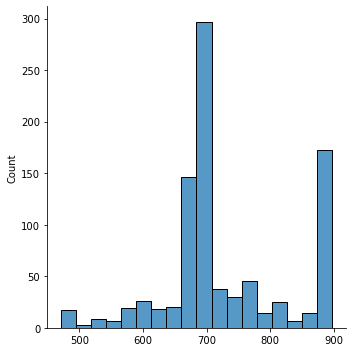

In [89]:
g = sns.displot(
    data=sensor_summary,
    kind='hist')

g.set_titles('hello')

In [93]:
df_merged = reduce(lambda left,right: pd.merge(left,right,on=['created_at'],
                                            how='outer'), sensor_df_list)


display(df_merged)


,created_at,19257,15553,8408,13143,22337,25451,20873,15235,3884,...,6428,1208,18399,20005,18811,20143,20469,23189,3277,21235
0,2018-11-15 00:00:00+00:00,32.52,300.46,334.07,NaN,NaN,NaN,NaN,222.39,220.11,...,250.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-11-16 00:00:00+00:00,94.65,498.17,436.18,NaN,NaN,NaN,NaN,329.23,76.95,...,404.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-11-17 00:00:00+00:00,NaN,474.91,197.34,NaN,NaN,NaN,NaN,303.85,73.22,...,358.11,NaN,NaN,NaN,149.54,NaN,NaN,NaN,NaN,NaN
3,2018-11-18 00:00:00+00:00,NaN,142.57,167.76,NaN,NaN,NaN,NaN,142.74,199.09,...,225.80,NaN,59.69,NaN,123.40,NaN,NaN,NaN,NaN,NaN
4,2018-11-19 00:00:00+00:00,NaN,281.62,174.93,NaN,NaN,NaN,NaN,179.93,59.68,...,188.48,NaN,65.14,NaN,137.95,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,2018-09-12 00:00:00+00:00,NaN,NaN,5.13,NaN,NaN,NaN,NaN,NaN,5.38,...,2.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893,2018-09-13 00:00:00+00:00,NaN,NaN,1.83,NaN,NaN,NaN,NaN,NaN,3.25,...,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,2018-09-14 00:00:00+00:00,NaN,NaN,2.49,NaN,NaN,NaN,NaN,NaN,1.76,...,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
895,2018-09-15 00:00:00+00:00,NaN,NaN,1.22,NaN,NaN,NaN,NaN,NaN,1.54,...,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
merged_df = df_merged.sort_values(by=['created_at'])

In [100]:
merged_df.to_csv('combined_purpleair_bayarea_2.5umPerdl_2018_2020.csv')

<AxesSubplot:>

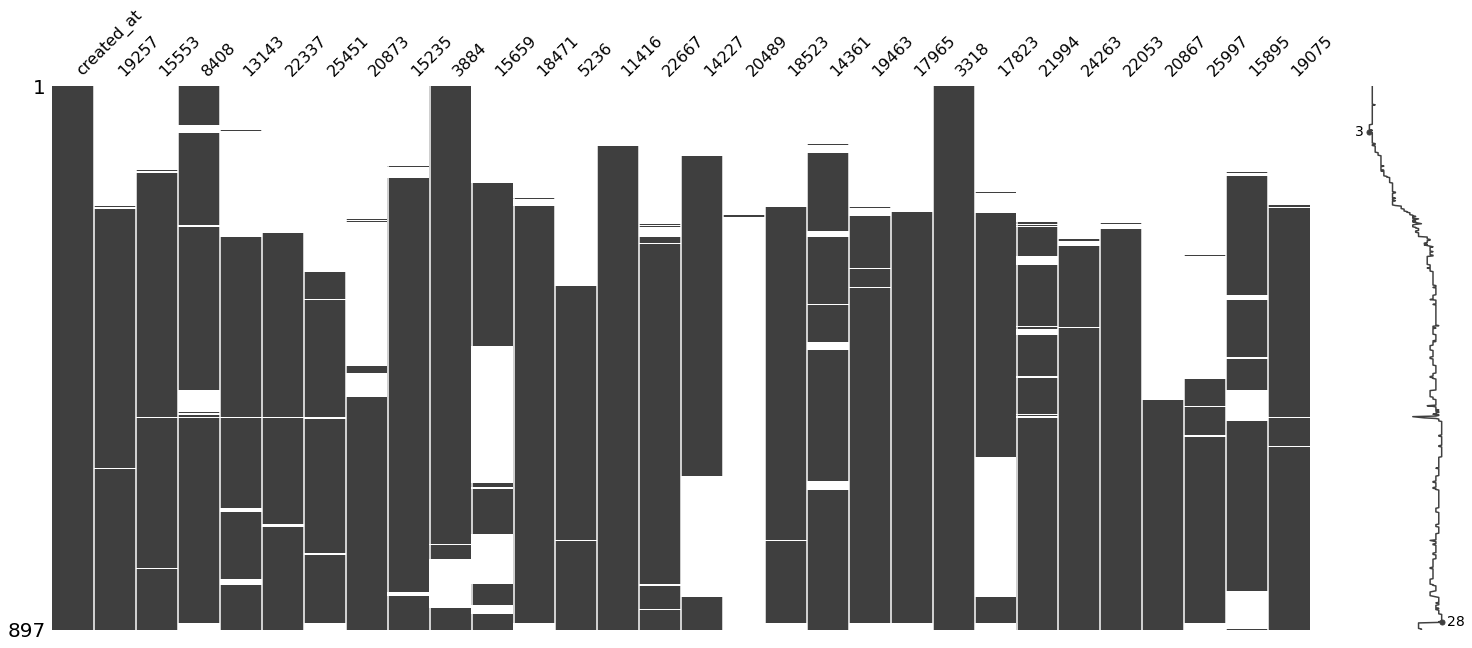

In [103]:
msno.matrix(merged_df.iloc[:, : 30])